In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checking nulls

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.duplicated().sum()

0

### Outliiers detection

In [4]:
round(df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.99]).T)

,count,mean,std,min,1%,2%,3%,5%,50%,95%,97%,99%,max
Pregnancies,768.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0,11.0,13.0,17.0
Glucose,768.0,121.0,32.0,0.0,57.0,69.0,73.0,79.0,117.0,181.0,188.0,196.0,199.0
BloodPressure,768.0,69.0,19.0,0.0,0.0,0.0,0.0,39.0,72.0,90.0,95.0,106.0,122.0
SkinThickness,768.0,21.0,16.0,0.0,0.0,0.0,0.0,0.0,23.0,44.0,46.0,51.0,99.0
Insulin,768.0,80.0,115.0,0.0,0.0,0.0,0.0,0.0,30.0,293.0,370.0,520.0,846.0
BMI,768.0,32.0,8.0,0.0,0.0,19.0,20.0,22.0,32.0,44.0,46.0,51.0,67.0
DiabetesPedigreeFunction,768.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0
Age,768.0,33.0,12.0,21.0,21.0,21.0,21.0,21.0,29.0,58.0,62.0,67.0,81.0
Outcome,768.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


### Remove outliers using clipping

In [5]:
def lw_out(x):
    x=x.clip(lower=x.quantile(0.05))
    return x
def up_out(x):
    x=x.clip(upper=x.quantile(0.95))
    return x


In [6]:
col=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [7]:
df[col]=df[col].apply(lw_out)
df[col]=df[col].apply(up_out)

In [8]:
round(df.describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.97,0.99]).T)

,count,mean,std,min,1%,2%,3%,5%,50%,95%,97%,99%,max
Pregnancies,768.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0,10.0,10.0,10.0
Glucose,768.0,121.0,29.0,79.0,79.0,79.0,79.0,79.0,117.0,181.0,181.0,181.0,181.0
BloodPressure,768.0,70.0,13.0,39.0,39.0,39.0,39.0,39.0,72.0,90.0,90.0,90.0,90.0
SkinThickness,768.0,20.0,15.0,0.0,0.0,0.0,0.0,0.0,23.0,44.0,44.0,44.0,44.0
Insulin,768.0,72.0,91.0,0.0,0.0,0.0,0.0,0.0,30.0,293.0,293.0,293.0,293.0
BMI,768.0,32.0,6.0,22.0,22.0,22.0,22.0,22.0,32.0,44.0,44.0,44.0,44.0
DiabetesPedigreeFunction,768.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
Age,768.0,33.0,11.0,21.0,21.0,21.0,21.0,21.0,29.0,58.0,58.0,58.0,58.0
Outcome,768.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


C:\Users\govin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


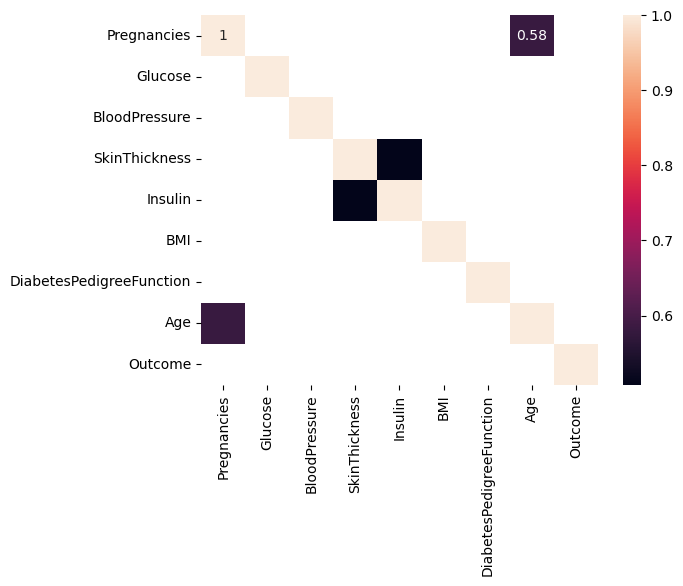

In [9]:
corr=df.corr()
sns.heatmap(corr[abs(corr)>0.5],annot=True)
plt.show()

In [10]:
df.drop(['Pregnancies','Age'],axis=1,inplace=True)

In [11]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148,72.0,35,0,33.6,0.62700,1
1,85,66.0,29,0,26.6,0.35100,0
2,181,64.0,0,0,23.3,0.67200,1
3,89,66.0,23,94,28.1,0.16700,0
4,137,40.0,35,168,43.1,1.13285,1


In [12]:
# Change datatype to int for Column BloodPressure
df['BloodPressure']=df['BloodPressure'].astype(int)

In [13]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148,72,35,0,33.6,0.62700,1
1,85,66,29,0,26.6,0.35100,0
2,181,64,0,0,23.3,0.67200,1
3,89,66,23,94,28.1,0.16700,0
4,137,40,35,168,43.1,1.13285,1


### Model Preperation

In [14]:
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']
print(x.shape)
print(y.shape)

(768, 6)
(768,)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=7)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(537, 6)
(537,)
(231, 6)
(231,)


In [17]:
lg1=LogisticRegression(max_iter=800)
lg1.fit(xtrain,ytrain)

LogisticRegression(max_iter=800)

In [18]:
print(lg1.score(xtrain,ytrain))
print(lg1.score(xtest,ytest))

0.7728119180633147
0.7619047619047619


In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf1=RandomForestClassifier(random_state=7)
rf1.fit(xtrain,ytrain)

RandomForestClassifier(random_state=7)

In [21]:
print(rf1.score(xtrain,ytrain))
print(rf1.score(xtest,ytest))

1.0
0.7186147186147186


In [22]:
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV

In [23]:
hparams_rf = {'max_depth':[4,5,6,7,8],
              'min_samples_split':[10,15,20]}

In [24]:
rf = RandomForestClassifier(random_state=0)
gs1 = GridSearchCV(estimator=rf,param_grid=hparams_rf,cv=3)
gs1.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [10, 15, 20]})

In [25]:
print(gs1.score(xtrain,ytrain))
print(gs1.score(xtest,ytest))

0.8286778398510242
0.7272727272727273


### Deploy Model

In [26]:
import pickle

In [27]:
pickle.dump(gs1,open("diabetes.pickle","wb"))

In [28]:
pick_file=pickle.load(open("diabetes.pickle","rb"))
pick_file

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [10, 15, 20]})

In [29]:
print(pick_file.feature_names_in_)

['Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction']


In [37]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148,72,35,0,33.6,0.62700,1
1,85,66,29,0,26.6,0.35100,0
2,181,64,0,0,23.3,0.67200,1
3,89,66,23,94,28.1,0.16700,0
4,137,40,35,168,43.1,1.13285,1


In [30]:
import sys 
print(sys. version)

3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [31]:
# !pip install scikit-learn==1.5.0
# !pip install --upgrade pip

In [33]:
# !pip install -U jupyter

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [33]:
import sklearn

In [34]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.5.0.


In [40]:
!pip install scikit-learn --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/ae/20/6d1a0a61d468b37a142fd90bb93c73bc1c2205db4a69ac630ed218c31612/scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp311-cp311-win_amd64.whl (11.0 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.0
    Uninstalling scikit-learn-1.5.0:
      Successfully uninstalled scikit-learn-1.5.0


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/ae/20/6d1a0a61d468b37a142fd90bb93c73bc1c2205db4a69ac630ed218c31612/scikit_learn-1.5.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 660.6 kB/s eta 0:00:17
   ---------------------------------------- 0.1/11.0 MB 1.2 MB/s eta 0:00:10
    --------------------------------------- 0.2/11.0 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.3/11.0 MB 1.6 MB/s eta 0:00:07
   - -------------------------------

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\cli\req_command.py", line 248, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\commands\install.py", line 452, in run
    installed = install_given_reqs(
                ^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_internal\req\__init__.py", line 72, in install_given_reqs
    requirement.install(
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [59]:
!conda update conda
!conda update anaconda

^C



PackageNotInstalledError: Package is not installed in prefix.
  prefix: C:\ProgramData\anaconda3
  package name: anaconda


